Student 1: Maarten Van Bockstaele (2262607) \
Student 2: Alexander Deleeck (2263131)

# Overview

The implemented ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure supports the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure
* the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [1]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [2]:
class TSTNode:
    def __init__(self, char):
        """
        Instantiates a TSTNode object.

        Args:
        - char: Character value of the node.

        Attributes:
        - char: Character value of the node.
        - left: Left child node.
        - middle: Middle child node.
        - right: Right child node.
        - is_end_of_word: Flag indicating if the node represents the end of a word.
        """
        self.char = char
        self.left = None
        self.middle = None
        self.right = None
        self.is_end_of_word = False

    def insert(self, word, index):
        """
        Inserts a string with a given index on the node in the Ternary Search Tree (TST).

        Args:
        - word: The string to be inserted.
        - index: The index of the current character in the string being inserted.
        """
        # If the current charachter of the word is lower, go left or create left.
        if word[index] < self.char:
            if self.left is None:
                self.left = TSTNode(word[index])
            self.left.insert(word, index)
            
        # If the current charachter of the word is greater, go right or create right.
        elif word[index] > self.char:
            if self.right is None:
                self.right = TSTNode(word[index])
            self.right.insert(word, index)
            
        # If not greater or lower and not end of word, go down or create down.
        elif index < len(word) - 1:
            if self.middle is None:
                self.middle = TSTNode(word[index + 1])
            self.middle.insert(word, index + 1)
            
        # We're at the end of the word so current node is an end node.
        else:
            self.is_end_of_word = True

    def search(self, word, index, exact=False):
        """
        Searches for a string in the TST.

        Args:
        - word: The string to search for.
        - index: The index of the current character in the string being searched.
        - exact: Flag indicating if an exact match is required.

        Returns:
        - True if the string is found (based on the 'exact' flag), False otherwise.
        """
        # If the current charachter of the word is lower, go left or return false.
        if word[index] < self.char:
            if self.left is None:
                return False
            return self.left.search(word, index, exact)
        
        # If the current charachter of the word is greater, go right or return false.
        elif word[index] > self.char:
            if self.right is None:
                return False
            return self.right.search(word, index, exact)
        
        # If not greater or lower and not end of word, go down or return false.
        elif index < len(word) - 1:
            if self.middle is None:
                return False
            return self.middle.search(word, index + 1, exact)
        
        # If we do an exact search, we need to check if we stop at end node else we're there.
        elif exact:
            return self.is_end_of_word
        return True

    def get_all_words(self, prefix, words):
        """
        Recursively explores each branch of the TST and appends complete words to the 'words' list.

        Args:
        - prefix: The prefix string formed by the previous nodes.
        - words: The list to store the complete words.
        """
        # If we're at the end of a node, word needs to be added.
        if self.is_end_of_word:
            words.append(prefix + self.char)
            
        # If we can go left, go left.
        if self.left is not None:
            self.left.get_all_words(prefix, words)
            
        # # If we can go down, go down and add character.
        if self.middle is not None:
            self.middle.get_all_words(prefix + self.char, words)
        
        # If we can go right, go right.
        if self.right is not None:
            self.right.get_all_words(prefix, words)

    def _to_string(self, indent='       '):
        """
        Returns a string representation of the TSTNode.

        Args:
        - indent: The indentation string.

        Returns:
        - The string representation of the TSTNode.
        """
        repr_str = indent + repr(self)

        if self.left is not None:
            repr_str += '\n_lt_:' + self.left._to_string(indent + '  ')
        if self.middle is not None:
            repr_str += '\n_eq_:' + self.middle._to_string(indent + '  ')
        if self.right is not None:
            repr_str += '\n_gt_:' + self.right._to_string(indent + '  ')
        return repr_str

    def __repr__(self):
        """
        Returns a string representation of the TSTNode.

        Returns:
        - The string representation of the TSTNode.
        """
        return f'char: {self.char}, terminates: {self.is_end_of_word}'


class TernarySearchTree:
    def __init__(self):
        """
        Instantiates a TernarySearchTree (TST) object.

        Attributes:
        - _root: The root node of the TST.
        - _terminates: Flag indicating if the TST is empty.
        """
        self._root = None
        self._terminates = False

    def insert(self, word):
        """
        Inserts a new string into the TST.

        Args:
        - word: The string to be inserted.
        """
        if word == "":
            self._terminates = True
        else:
            if self._root is None:
                self._root = TSTNode(word[0])
            self._root.insert(word, 0)

    def search(self, word, exact=False):
        """
        Searches for a string in the TST.

        Args:
        - word: The string to search for.
        - exact: Flag indicating if an exact match is required.

        Returns:
        - True if the string is found (based on the 'exact' flag), False otherwise.
        """
        if word == "":
            return not exact
        elif self._root is None:
            return False
        return self._root.search(word, 0, exact)

    def all_strings(self):
        """
        Retrieves all the strings stored in the TST.

        Returns:
        - A list containing all the stored strings.
        """
        if self._terminates:
            words = [""]
        else:
            words = []
        if self._root is not None:
            self._root.get_all_words("", words)
        return words

    def __len__(self):
        """
        Returns the number of strings stored in the TST.

        Returns:
        - The number of stored strings.
        """
        if self._root is None:
            return 0
        else:
            return len(self.all_strings())

    def __repr__(self):
        """
        Returns a string representation of the TST.

        Returns:
        - The string representation of the TST.
        """
        if self._root is None:
            return 'empty tree'
        else:
            return f'terminates: {self._terminates} \n' + self._root._to_string()


# Example usage

Create a new empty ternery search tree.

In [3]:
tst = TernarySearchTree()

Inserting 6 different strings into the tree.

In [4]:
tst.insert('hassle')
tst.insert('has')
tst.insert('slender')
tst.insert('endearing')
tst.insert('enduring')
tst.insert('rings')

Display the tree.

In [5]:
print(tst)

terminates: False 
       char: h, terminates: False
_lt_:         char: e, terminates: False
_eq_:           char: n, terminates: False
_eq_:             char: d, terminates: False
_eq_:               char: e, terminates: False
_eq_:                 char: a, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_gt_:                 char: u, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_eq_:         char: a, terminates: False
_eq_:           char: s, terminates: True
_eq_:             char: s, terminates: False
_eq_:               char: l, terminates: False
_eq_:                 char: e, terminates: True
_gt_:         char: 

Insert another string `'aqt'`.

In [6]:
tst.insert('aqt')

In [7]:
print(tst)

terminates: False 
       char: h, terminates: False
_lt_:         char: e, terminates: False
_lt_:           char: a, terminates: False
_eq_:             char: q, terminates: False
_eq_:               char: t, terminates: True
_eq_:           char: n, terminates: False
_eq_:             char: d, terminates: False
_eq_:               char: e, terminates: False
_eq_:                 char: a, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_gt_:                 char: u, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_eq_:         char: a, terminates: False
_eq_:           char: s, terminates: True
_eq_:             char: s,

The tree should now contain seven strings.

In [8]:
len(tst)

7

Check whether all the stored strings can be fetched and returned as a list:

In [9]:
tst.all_strings()

['aqt', 'endearing', 'enduring', 'has', 'hassle', 'rings', 'slender']

Search for the string `'end'`, it should be found since it is a prefix of other strings in the TST. We specify the exact argument to be False, in order to search for prefixes and not exact strings.

In [10]:
tst.search('end', False)

True

The string `'enc'` should not be found.

In [11]:
tst.search('enc')

False

The tree can also contain the empty string.

In [12]:
tst.insert('')

In [13]:
len(tst)

8

In [14]:
print(tst)

terminates: True 
       char: h, terminates: False
_lt_:         char: e, terminates: False
_lt_:           char: a, terminates: False
_eq_:             char: q, terminates: False
_eq_:               char: t, terminates: True
_eq_:           char: n, terminates: False
_eq_:             char: d, terminates: False
_eq_:               char: e, terminates: False
_eq_:                 char: a, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_gt_:                 char: u, terminates: False
_eq_:                   char: r, terminates: False
_eq_:                     char: i, terminates: False
_eq_:                       char: n, terminates: False
_eq_:                         char: g, terminates: True
_eq_:         char: a, terminates: False
_eq_:           char: s, terminates: True
_eq_:             char: s, 

In [15]:
tst.all_strings()

['', 'aqt', 'endearing', 'enduring', 'has', 'hassle', 'rings', 'slender']

# Testing

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [16]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [17]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [18]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [19]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only exact inserted words are retrieved and no prefixes of words.

In [20]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [21]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [22]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [23]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [24]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

In [25]:
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

# Performance

## Insert

To assess the performance, i.e., the time it takes to insert a new string or search the binary tree as a function of the tree's size, we need a large dataset.  This is provided in `data/search_trees/corncob_lowercase.txt`.  This file contains over 58,000 English words, all lower case. We will select random samples of increasing sizes from the list and subsequently we time how long it takes to insert words into a B-tree of various sizes.  First we build the B-tree based on the sample, and then we insert words.

In [26]:
import random
import time
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]


samples = [
    random.sample(words, k=size) for size in sizes
]

nr_runs = 10
times = {}
insert_sample = random.sample(words, k=20)
for sample in samples:
    TST = TernarySearchTree()
    for word in sample:
        TST.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            TST.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times


{100: 0.0,
 500: 0.0,
 1000: 0.09919,
 5000: 0.09147,
 10000: 0.0,
 20000: 0.10015,
 30000: 0.0997,
 40000: 0.1002,
 50000: 0.1042}

In [27]:
import matplotlib.pyplot as plt

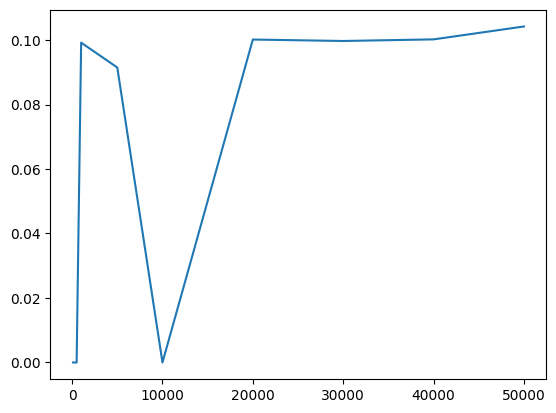

In [28]:
plt.plot(times.keys(), times.values())

On the plot, it appears to be the case that certain lengths of word insertions can happen relatively quickly, while others take much more time. We think that this happens due to some sets of words sharing many prefixes, speeding everything up, while other sets have a more diverse set of words and prefixes, which causes more operations to have to be performed. Furthermore, is seems that a for large trees, runtime is on average very similar.

## Search

We can do the same for searching words in a TST of various sizes.  First we build the TST based on the sample, and then we search words.

In [29]:
nr_runs = 10
times = {}

search_sample = random.sample(sample, k=20)
for sample in samples:
    TST = TernarySearchTree()
    for word in sample:
        TST.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            TST.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*100_000.0
times

{100: 0.0,
 500: 0.0,
 1000: 0.0,
 5000: 0.9996,
 10000: 0.0,
 20000: 0.0,
 30000: 0.0,
 40000: 0.9962,
 50000: 0.0}

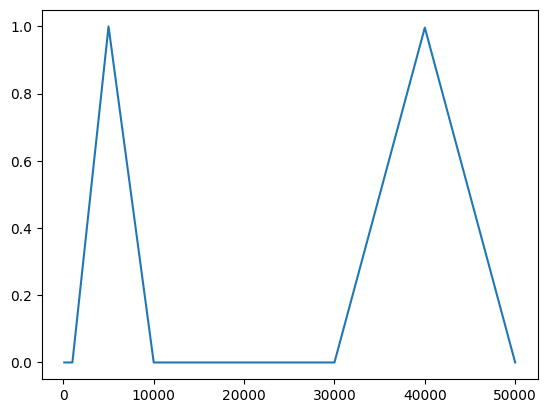

In [30]:
plt.plot(times.keys(), times.values())

We roughly see the same as for the insertion method.

# Complexity analysis

## Insertion

- The ideal case for insertion is when the least number of comparisons have to be performed to insert a new string of length n. This ideal case occurs when the new string can be inserted directly at the root node of the TST, because no comparisons have to be performed. 
- In the average case, insertion will take time proportional to the height of the TST. Thus, theoretically the insertion of a string of length k in a TST with n nodes will have a complexity of O(log n + k), since there will occur k middle paths to be traversed and log(n) left/right traversals. We have here log(n) and not n since in each node, we go left or right and hence we split up the possibilitities in half. 
Thus, the TST is best suited for handling a number of (relatively) short strings with common prefixes.

## Search
- Similarly to the insertion operation, search will also theoretically be O(log n + k) running time. This is for the same reasons as the insertion case, namely an expected k traversals to middle nodes and log(n) traversals to the left and right children. 

So in conclusion it is very difficult to determine the time complexicity for a ternary search tree because it is dependent on many factors. Factors that play a role in the time complexicity are how the words already in the graph have been inserted, the length of the already inserted words, the length of a new word that needs to be inserted/search and the similarity of that word compared to words already in the graph. 